<a href="https://colab.research.google.com/github/Wal14ber/-eleicoes-roraima-2024-/blob/main/%22Partidos_com_mais_votos_nos_munic%C3%ADpios_de_Roraima_%E2%80%93_Elei%C3%A7%C3%B5es_2024%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-9684156.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='votos', y='partido', data=ranking_partido, palette="viridis")


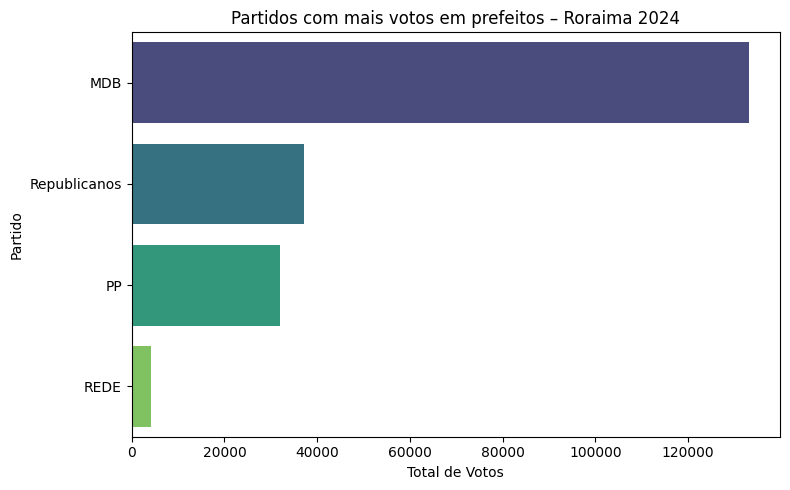

/tmp/ipython-input-1-9684156.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='votos', y='ideologia', data=ranking_ideologia, palette="Set2")


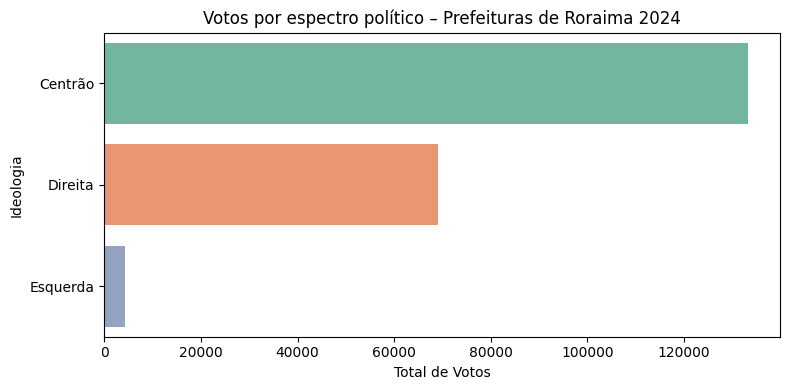

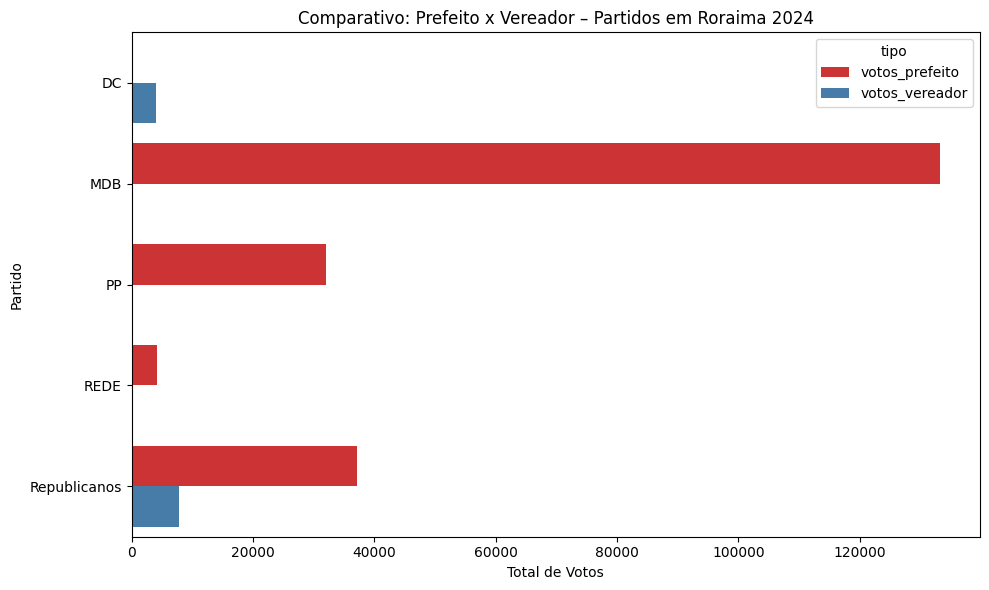

In [1]:
import pandas as pd

# Dados extraídos de Wikipedia / TSE
dados = [
    {"municipio": "Alto Alegre",      "partido": "Republicanos", "votos": 6983},
    {"municipio": "Amajari",          "partido": "PP",          "votos": 3127},
    {"municipio": "Boa Vista",        "partido": "MDB",         "votos": 133180},
    {"municipio": "Bonfim",           "partido": "Republicanos", "votos": 5243},
    {"municipio": "Cantá",            "partido": "PP",          "votos": 7433},
    {"municipio": "Caracaraí",        "partido": "PP",          "votos": 5943},
    {"municipio": "Caroebe",          "partido": "Republicanos", "votos": 3756},
    {"municipio": "Iracema",          "partido": "Republicanos", "votos": 3677},
    {"municipio": "Mucajaí",          "partido": "Republicanos", "votos": 6199},
    {"municipio": "Normandia",        "partido": "PP",          "votos": 5036},
    {"municipio": "Pacaraima",        "partido": "PP",          "votos": 3573},
    {"municipio": "Rorainópolis",     "partido": "Republicanos", "votos": 11217},
    {"municipio": "São João da Baliza","partido": "PP",         "votos": 3852},
    {"municipio": "São Luiz",         "partido": "PP",          "votos": 3064},
    {"municipio": "Uiramutã",         "partido": "REDE",        "votos": 4214},
]

df = pd.DataFrame(dados)
df.head()

# No caso, há exatamente um prefeito eleito por município → o partido listado é o vencedor
df_partido_municipio = df[['municipio', 'partido', 'votos']]
df_partido_municipio

# Somar votos de cada partido em todos os municípios
ranking_partido = (df.groupby('partido')['votos']
                    .sum()
                    .reset_index()
                    .sort_values(by='votos', ascending=False))
ranking_partido


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='votos', y='partido', data=ranking_partido, palette="viridis")
plt.title("Partidos com mais votos em prefeitos – Roraima 2024")
plt.xlabel("Total de Votos")
plt.ylabel("Partido")
plt.tight_layout()
plt.show()

# Criando dicionário de classificação política
classificacao_ideologica = {
    "PP": "Direita",
    "Republicanos": "Direita",
    "MDB": "Centrão",
    "REDE": "Esquerda"
}

# Adicionando nova coluna
ranking_partido['ideologia'] = ranking_partido['partido'].map(classificacao_ideologica)
ranking_partido

# Agrupar votos por ideologia
ranking_ideologia = (ranking_partido.groupby('ideologia')['votos']
                     .sum()
                     .reset_index()
                     .sort_values(by='votos', ascending=False))

# Gráfico
plt.figure(figsize=(8,4))
sns.barplot(x='votos', y='ideologia', data=ranking_ideologia, palette="Set2")
plt.title("Votos por espectro político – Prefeituras de Roraima 2024")
plt.xlabel("Total de Votos")
plt.ylabel("Ideologia")
plt.tight_layout()
plt.show()

dados_vereadores = [
 {"nome": "Roberto Franco", "partido": "DC", "votos": 4043},
 {"nome": "Italo Otavio", "partido": "Republicanos", "votos": 4024},
 {"nome": "Genilson Costa", "partido": "Republicanos", "votos": 3744},
 # (adicione os demais conforme a lista)
]
df_ver = pd.DataFrame(dados_vereadores)
df_ver.head()

ver_partido = (df_ver.groupby('partido')
                 .agg(votos=('votos', 'sum'),
                      cadeiras=('nome', 'count'))
                 .reset_index()
                 .sort_values(by='votos', ascending=False))
ver_partido


# df = prefeitos…
total_partidos = pd.merge(
    ranking_partido[['partido','votos']].rename(columns={'votos':'votos_prefeito'}),
    ver_partido[['partido','votos','cadeiras']].rename(columns={'votos':'votos_vereador'}),
    on='partido', how='outer').fillna(0)

total_partidos

total_partidos_melt = total_partidos.melt(
    id_vars='partido',
    value_vars=['votos_prefeito','votos_vereador'],
    var_name='tipo', value_name='votos')

plt.figure(figsize=(10,6))
sns.barplot(x='votos', y='partido', hue='tipo', data=total_partidos_melt, palette="Set1")
plt.title("Comparativo: Prefeito x Vereador – Partidos em Roraima 2024")
plt.xlabel("Total de Votos")
plt.ylabel("Partido")
plt.tight_layout()
plt.show()

total_partidos['ideologia'] = total_partidos['partido'].map(classificacao_ideologica)

plt.savefig("grafico.png")

